---
title:  "Useful_Function 02"
excerpt: "numpy concatenate"

categories:
  - Function
tags:
  - Numpy
  - stack
  - unstack
  - Pivot
  - melt
last_modified_at: 2020-04-17T09:06:00-05:00
---

In [20]:
from collections import OrderedDict
from pandas import DataFrame
import pandas as pd
import numpy as np

# Stack & Unstack
    stack : 데이터 구조를 좀더 taller 하게 쌓는 구조 (mutie index 일 경우, 가장 안쪽부터(작은레벨) 적용되며, 변경가능)
    unstack : 데이터 구조를 좀더 widely 하게 쌓는 구조 (mutie index 일 경우, 가장 안쪽부터(작은레벨) 적용되며, 변경가능)

#### 기본적으로 stack - ustack 구조는 multi 에서 사용하는게 적절해 보이고, 1레벨에서는 주의해야 한다.
#### 하기 그림은 기본적으로 2레벨임. 1레벨일때는 다름

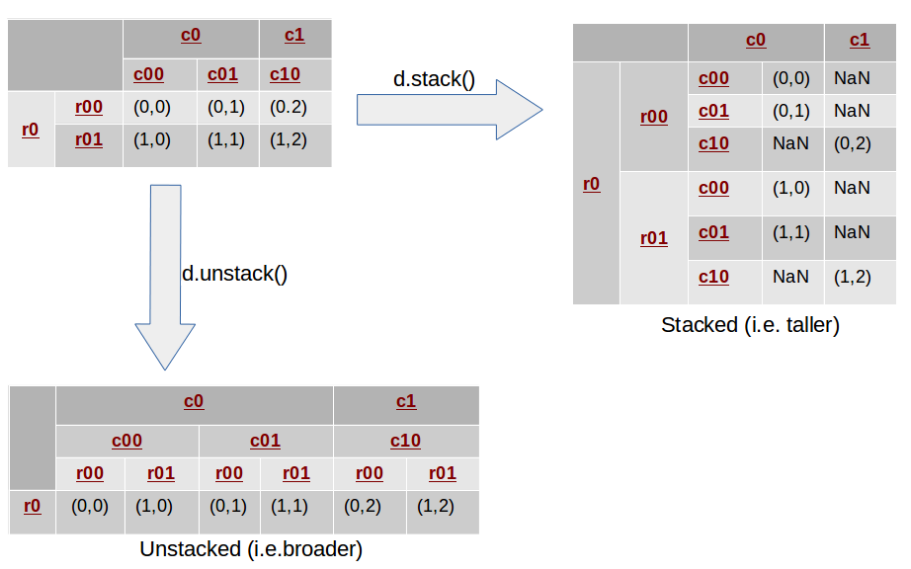

In [21]:
# Row Multi-Index
row_idx_arr = list(zip(['r0', 'r0'], ['r-00', 'r-01']))
row_idx = pd.MultiIndex.from_tuples(row_idx_arr)

# Column Multi-Index
col_idx_arr = list(zip(['c0', 'c0', 'c1'], ['c-00', 'c-01', 'c-10']))
col_idx = pd.MultiIndex.from_tuples(col_idx_arr)

# Create the DataFrame
d = DataFrame(np.arange(6).reshape(2,3), index=row_idx, columns=col_idx)
d = d.applymap(lambda x: (x // 3, x % 3))
d

c0              c1
           c-00    c-01    c-10
r0 r-00  (0, 0)  (0, 1)  (0, 2)
   r-01  (1, 0)  (1, 1)  (1, 2)

In [22]:
s = d.stack(level=-1)
s

c0      c1
r0 r-00 c-00  (0, 0)     NaN
        c-01  (0, 1)     NaN
        c-10     NaN  (0, 2)
   r-01 c-00  (1, 0)     NaN
        c-01  (1, 1)     NaN
        c-10     NaN  (1, 2)

In [23]:
s = d.stack(level=-2)
s

c-00    c-01    c-10
r0 r-00 c0  (0, 0)  (0, 1)     NaN
        c1     NaN     NaN  (0, 2)
   r-01 c0  (1, 0)  (1, 1)     NaN
        c1     NaN     NaN  (1, 2)

In [24]:
u = d.unstack(level=-1)
u

c0                              c1        
      c-00            c-01            c-10        
      r-00    r-01    r-00    r-01    r-00    r-01
r0  (0, 0)  (1, 0)  (0, 1)  (1, 1)  (0, 2)  (1, 2)

## 1레벨일 경우

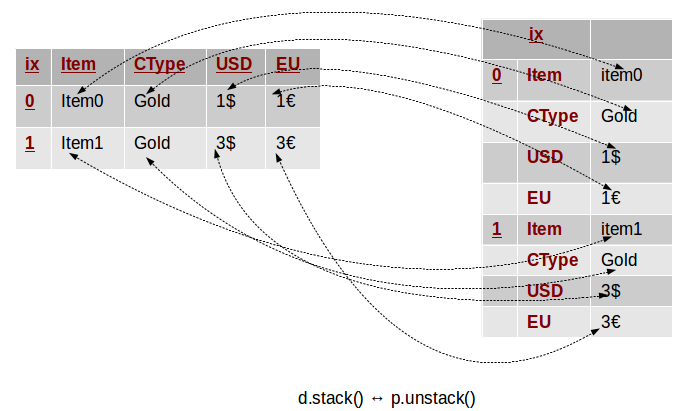

In [1]:
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item1', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))
d = DataFrame(table) ## level 1 type 임
d

,Item,CType,USD,EU
0,Item0,Gold,1$,1€
1,Item0,Bronze,2$,2€
2,Item1,Gold,3$,3€
3,Item1,Silver,4$,4€


In [3]:
print(d.index)
print(d.columns)

RangeIndex(start=0, stop=4, step=1)
Index(['Item', 'CType', 'USD', 'EU'], dtype='object')


In [13]:
## 현 상태에서, d 를 stack 하면, d 는 현재 컬럼레벨이 1이니, Item, Ctype,USD,EU 컬럼 모두 index로 변경된다.
## column은 1줄 (single columns)으로 된다. 그 결과, dstack 는 MultiIndex가 된다.
dstack = d.stack()
print(type(dstack))
print(dstack,"\n",dstack.index,"\n")

<class 'pandas.core.series.Series'>
0  Item      Item0
   CType      Gold
   USD          1$
   EU           1€
1  Item      Item0
   CType    Bronze
   USD          2$
   EU           2€
2  Item      Item1
   CType      Gold
   USD          3$
   EU           3€
3  Item      Item1
   CType    Silver
   USD          4$
   EU           4€
dtype: object 
 MultiIndex(levels=[[0, 1, 2, 3], ['Item', 'CType', 'USD', 'EU']],
           codes=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]]) 



In [15]:
d

,Item,CType,USD,EU
0,Item0,Gold,1$,1€
1,Item0,Bronze,2$,2€
2,Item1,Gold,3$,3€
3,Item1,Silver,4$,4€


In [16]:
## 현 상태에서, d 를 unstack 하면, d 는 현재 index레벨이 1이니, 0,1,2,3 과 Item,Cypte,USD,EU 들이 모두 index 되어 multiindex가 된다
## 단, 상위레벨만 다르다. (위에서는 기존 index가 1레벨이지만, unstack 에서는 2레벨리 된다)
## 이는 기본적으로 stack - ustack 구조는 multi 에서 사용하는게 적절해 보이고, 1레벨에서는 주의해야 한다.
d_unstack = d.unstack()
print(type(d_unstack))
print(d_unstack,"\n",d_unstack.index,"\n")

<class 'pandas.core.series.Series'>
Item   0     Item0
       1     Item0
       2     Item1
       3     Item1
CType  0      Gold
       1    Bronze
       2      Gold
       3    Silver
USD    0        1$
       1        2$
       2        3$
       3        4$
EU     0        1€
       1        2€
       2        3€
       3        4€
dtype: object 
 MultiIndex(levels=[['Item', 'CType', 'USD', 'EU'], [0, 1, 2, 3]],
           codes=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]]) 



In [19]:
## 이미 stack 을 했던 구조를 unstack 하는걸로 보면 이해하기 쉬움
## Stacking and unstacking can also be applied to data with flat (i.e. non-hierchical) indices.
##In this case, one of the indices is de facto removed (the columns index if stacking, and the rows if unstacking) 
## and its values are nested in the other index, which is now a MultiIndex. 
## Therefore, the result is always a Series with a hierarchical index. The following example demonstrates this:

# Pivot
    피벗 기능은 주어진 테이블에서 새로운 파생 테이블을 만드는 데 사용된다. 피벗은 index, columns, values 라는 이름을 가진 세 가지 parameter를 취한다. 이러한 각 파라미터의 값으로 원래 표에 열 이름을 지정해야 한다. 그런 다음 피벗 함수는 새로운 테이블을 생성하며, 행과 열 지수는 각 매개변수의 고유한 값이다. 새 테이블의 셀 값은 값 파라미터로 주어진 열에서 취한다.

In [25]:
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item1', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))
d = DataFrame(table)
d

,Item,CType,USD,EU
0,Item0,Gold,1$,1€
1,Item0,Bronze,2$,2€
2,Item1,Gold,3$,3€
3,Item1,Silver,4$,4€


In [26]:
p = d.pivot(index='Item', columns='CType', values='USD')
p

CType,Bronze,Gold,Silver
Item,,,
Item0,2$,1$,NaN
Item1,NaN,3$,4$


In [28]:
# Original DataFrame: Access the USD cost of Item0 for Gold customers
print (d[(d.Item=='Item0') & (d.CType=='Gold')].USD.values)

# Pivoted DataFrame: Access the USD cost of Item0 for Gold customers
print (p[p.index=='Item0'].Gold.values)

['1$']
['1$']


In [31]:
## 하기처럼, values 파라미터에 값 없이 줄 수도 있음 그렇게 되면, MultiIndex가 된다
p = d.pivot(index='Item', columns='CType')
print(p.index,"\n",p.columns)
p

Index(['Item0', 'Item1'], dtype='object', name='Item') 
 MultiIndex(levels=[['USD', 'EU'], ['Bronze', 'Gold', 'Silver']],
           codes=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=[None, 'CType'])


USD                 EU            
CType Bronze Gold Silver Bronze Gold Silver
Item                                       
Item0     2$   1$    NaN     2€   1€    NaN
Item1    NaN   3$     4$    NaN   3€     4€

#### 단 pivot 을 할때, 지정하는 inded, columns 의 경우, 각각의 축이 되기때문에, 같은 값이 존재할경우, pivoting 이 실패할수 있다. 이럴때는 aggfunc를 써서 어떻게 값을 지정해야 하는지를 명시해야 한다.

In [36]:
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item0', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  [1, 2, 3, 4]),
    ('EU',   [1.1, 2.2, 3.3, 4.4])
))
d = DataFrame(table)
d
## 여기서 Item0 - Gold 의 USD 값은 2개이다. 이에 대해서, 명확히 aggfunc=np.sum 을 알려줘야 에러가 안난다.

,Item,CType,USD,EU
0,Item0,Gold,1,1.1
1,Item0,Bronze,2,2.2
2,Item0,Gold,3,3.3
3,Item1,Silver,4,4.4


In [37]:
p = d.pivot_table(index='Item', columns='CType', values='USD', aggfunc=np.sum)
p.fillna(value='--',inplace=True)
p

CType,Bronze,Gold,Silver
Item,,,
Item0,2,4,--
Item1,--,--,4


# Melt
    melt() 는 ID 변수를 기준으로 원래 데이터셋에 있던 여러개의 칼럼 이름을 'variable' 칼럼에 위에서 아래로 길게 쌓아놓고, 'value' 칼럼에 ID와 variable에 해당하는 값을 넣어주는 식으로 데이터를 재구조화합니다.  말로 설명하자니 좀 어려운데요, 아래의 melt() 적용 전, 후의 이미지를 참고하시기 바랍니다.

출처: https://rfriend.tistory.com/tag/Python pandas melt() 함수 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

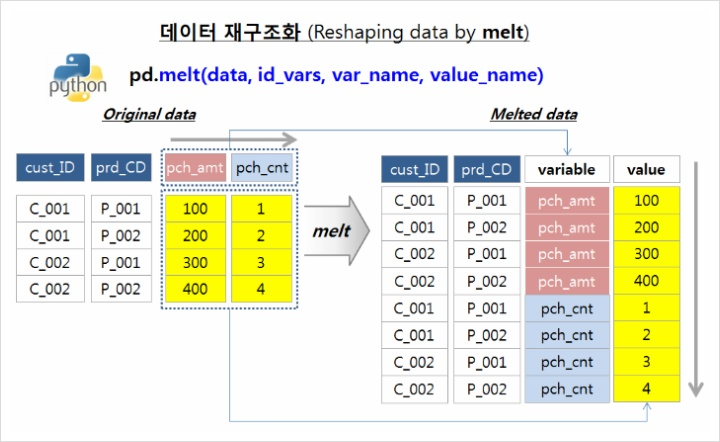

#### pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None)

In [38]:
data = DataFrame({'cust_ID' : ['C_001', 'C_001', 'C_002', 'C_002'],
                  'prd_CD' : ['P_001', 'P_002', 'P_001', 'P_002'],
                  'pch_cnt' : [1, 2, 3, 4],
                  'pch_amt' : [100, 200, 300, 400]})
data

,cust_ID,prd_CD,pch_cnt,pch_amt
0,C_001,P_001,1,100
1,C_001,P_002,2,200
2,C_002,P_001,3,300
3,C_002,P_002,4,400


In [40]:
mp = pd.melt(frame=data, id_vars=['cust_ID', 'prd_CD'])
print(type(mp))
mp

<class 'pandas.core.frame.DataFrame'>


,cust_ID,prd_CD,variable,value
0,C_001,P_001,pch_cnt,1
1,C_001,P_002,pch_cnt,2
2,C_002,P_001,pch_cnt,3
3,C_002,P_002,pch_cnt,4
4,C_001,P_001,pch_amt,100
5,C_001,P_002,pch_amt,200
6,C_002,P_001,pch_amt,300
7,C_002,P_002,pch_amt,400


In [41]:
pd.melt(frame=data, id_vars=['cust_ID'])

,cust_ID,variable,value
0,C_001,prd_CD,P_001
1,C_001,prd_CD,P_002
2,C_002,prd_CD,P_001
3,C_002,prd_CD,P_002
4,C_001,pch_cnt,1
5,C_001,pch_cnt,2
6,C_002,pch_cnt,3
7,C_002,pch_cnt,4
8,C_001,pch_amt,100
9,C_001,pch_amt,200


#### melt 는 id_vars (기준) 가 정해지면, 나머지 컬럼들을 오로지 기준 컬럼에  맞추어 모두 정렬하는 것이다. 위에서는 value_vars 를 정하지 않았기에, 자동으로 모든 [prd_CD,	pch_cnt, pch_amt] 들이 value_vars 자리에 1줄 single colum으로 해당 value를 모두 표현할때까지 들어간다

In [45]:
pd.melt(frame=data, id_vars=['cust_ID'], value_vars = ['pch_amt']) ## pch_amt,prd_CD

,cust_ID,variable,value
0,C_001,pch_amt,100
1,C_001,pch_amt,200
2,C_002,pch_amt,300
3,C_002,pch_amt,400


## metl 와 pivot 의 비교

In [46]:
# comparison among (a) data vs. (b) pd.melt() vs. pd.pivot_table()
data

,cust_ID,prd_CD,pch_cnt,pch_amt
0,C_001,P_001,1,100
1,C_001,P_002,2,200
2,C_002,P_001,3,300
3,C_002,P_002,4,400


In [49]:
data_melt = pd.melt(frame=data, id_vars=['cust_ID', 'prd_CD'],var_name='pch_CD', value_name='pch_value')
data_melt

,cust_ID,prd_CD,pch_CD,pch_value
0,C_001,P_001,pch_cnt,1
1,C_001,P_002,pch_cnt,2
2,C_002,P_001,pch_cnt,3
3,C_002,P_002,pch_cnt,4
4,C_001,P_001,pch_amt,100
5,C_001,P_002,pch_amt,200
6,C_002,P_001,pch_amt,300
7,C_002,P_002,pch_amt,400


In [51]:
print(data_melt.index,"\n",data_melt.columns)

RangeIndex(start=0, stop=8, step=1) 
 Index(['cust_ID', 'prd_CD', 'pch_CD', 'pch_value'], dtype='object')


In [52]:
data_melt_pivot = pd.pivot_table(data=data_melt,index=['cust_ID', 'prd_CD'],columns='pch_CD', values='pch_value',aggfunc=np.mean)
data_melt_pivot

pch_CD          pch_amt  pch_cnt
cust_ID prd_CD                  
C_001   P_001       100        1
        P_002       200        2
C_002   P_001       300        3
        P_002       400        4

In [53]:
print(data_melt_pivot.index,data_melt_pivot.columns)

MultiIndex(levels=[['C_001', 'C_002'], ['P_001', 'P_002']],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['cust_ID', 'prd_CD']) Index(['pch_amt', 'pch_cnt'], dtype='object', name='pch_CD')
